In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
# loading MNIST

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

trainset = torchvision.datasets.MNIST(root = './MNISTdata', train = True, download = True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4)

testset = torchvision.datasets.MNIST(root = './MNISTdata', train = False, download = True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 22051365.81it/s]


Extracting ./MNISTdata/MNIST/raw/train-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1714515.93it/s]

Extracting ./MNISTdata/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14843007.19it/s]


Extracting ./MNISTdata/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1950100.19it/s]

Extracting ./MNISTdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


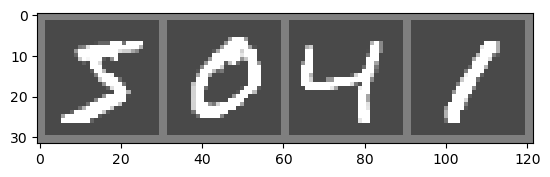

In [5]:
# visualize the training images
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [10]:
# define the CNN!

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        
        x = self.pool(x)
        
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.dropout2(x)
        x = torch.flatten(x, 1)
        x = self.fc2(x)
        
        output = F.log_softmax(x, dim = 1)
        
        return output        

In [13]:
net = Net()

optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [14]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss = running_loss + loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print("Finished Training")
        

[1,  2000] loss: 0.558
[1,  4000] loss: 0.254
[1,  6000] loss: 0.166
[1,  8000] loss: 0.160
[1, 10000] loss: 0.127
[1, 12000] loss: 0.135
[1, 14000] loss: 0.110
[2,  2000] loss: 0.107
[2,  4000] loss: 0.089
[2,  6000] loss: 0.076
[2,  8000] loss: 0.085
[2, 10000] loss: 0.080
[2, 12000] loss: 0.088
[2, 14000] loss: 0.076
Finished Training


In [16]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [17]:
test(net, "cpu", test_loader)


Test set: Average loss: 0.0385, Accuracy: 9882/10000 (99%)

